Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6422 - accuracy: 0.6783
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7433 - accuracy: 0.7176
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6626 - accuracy: 0.7382
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6332 - accuracy: 0.7431
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6180 - accuracy: 0.7480
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6127 - accuracy: 0.7515
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5852 - accuracy: 0.7659
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5621 - accuracy: 0.7867
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5476 - accuracy: 0.7956
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


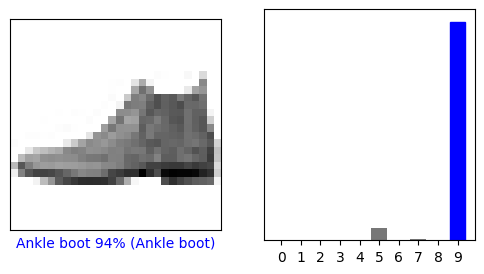

In [17]:
# Importing libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Takes the img as an input and converts it into a 1D array
  tf.keras.layers.Dense(128, activation='relu'), # Fed into a dense layer connected with 128 nodes - relu checks that a min threshold is met, otherwise it outputs 0
  tf.keras.layers.Dense(10) # Final output dense layer, the 10 nodes correspond to the 10 items of clothing in our dataset
  
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=10)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()